In [20]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

data = pd.read_csv("/content/transaction_anomalies_dataset.csv")
print(data.head())

  Transaction_ID  Transaction_Amount  Transaction_Volume  \
0            TX0         1024.835708                   3   
1            TX1         1013.952065                   4   
2            TX2          970.956093                   1   
3            TX3         1040.822254                   2   
4            TX4          998.777241                   1   

   Average_Transaction_Amount  Frequency_of_Transactions  \
0                  997.234714                         12   
1                 1020.210306                          7   
2                  989.496604                          5   
3                  969.522480                         16   
4                 1007.111026                          7   

   Time_Since_Last_Transaction Day_of_Week Time_of_Day  Age  Gender   Income  \
0                           29      Friday       06:00   36    Male  1436074   
1                           22      Friday       01:00   41  Female   627069   
2                           12     Tue

In [21]:
print(data.isnull().sum())

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64


In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB
None


In [23]:
print(data.describe())

       Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
count         1000.000000         1000.000000                 1000.000000   
mean          1038.122511            2.498000                 1000.682506   
std            283.580055            1.115006                   20.632334   
min            849.024392            1.000000                  939.081423   
25%            966.028796            1.000000                  986.800556   
50%           1002.118678            3.000000                 1000.501902   
75%           1033.143657            3.000000                 1015.155595   
max           3227.459108            4.000000                 1073.154036   

       Frequency_of_Transactions  Time_Since_Last_Transaction          Age  \
count                1000.000000                  1000.000000  1000.000000   
mean                   12.078000                    15.341000    40.641000   
std                     4.245225                     8.361258    13.8199

In [24]:
# Distribution of Transaction Amount
fig_amount = px.histogram(data, x='Transaction_Amount',
                          nbins=20,
                          title='Distribution of Transaction Amount')
fig_amount.show()

In [69]:
import seaborn as sns

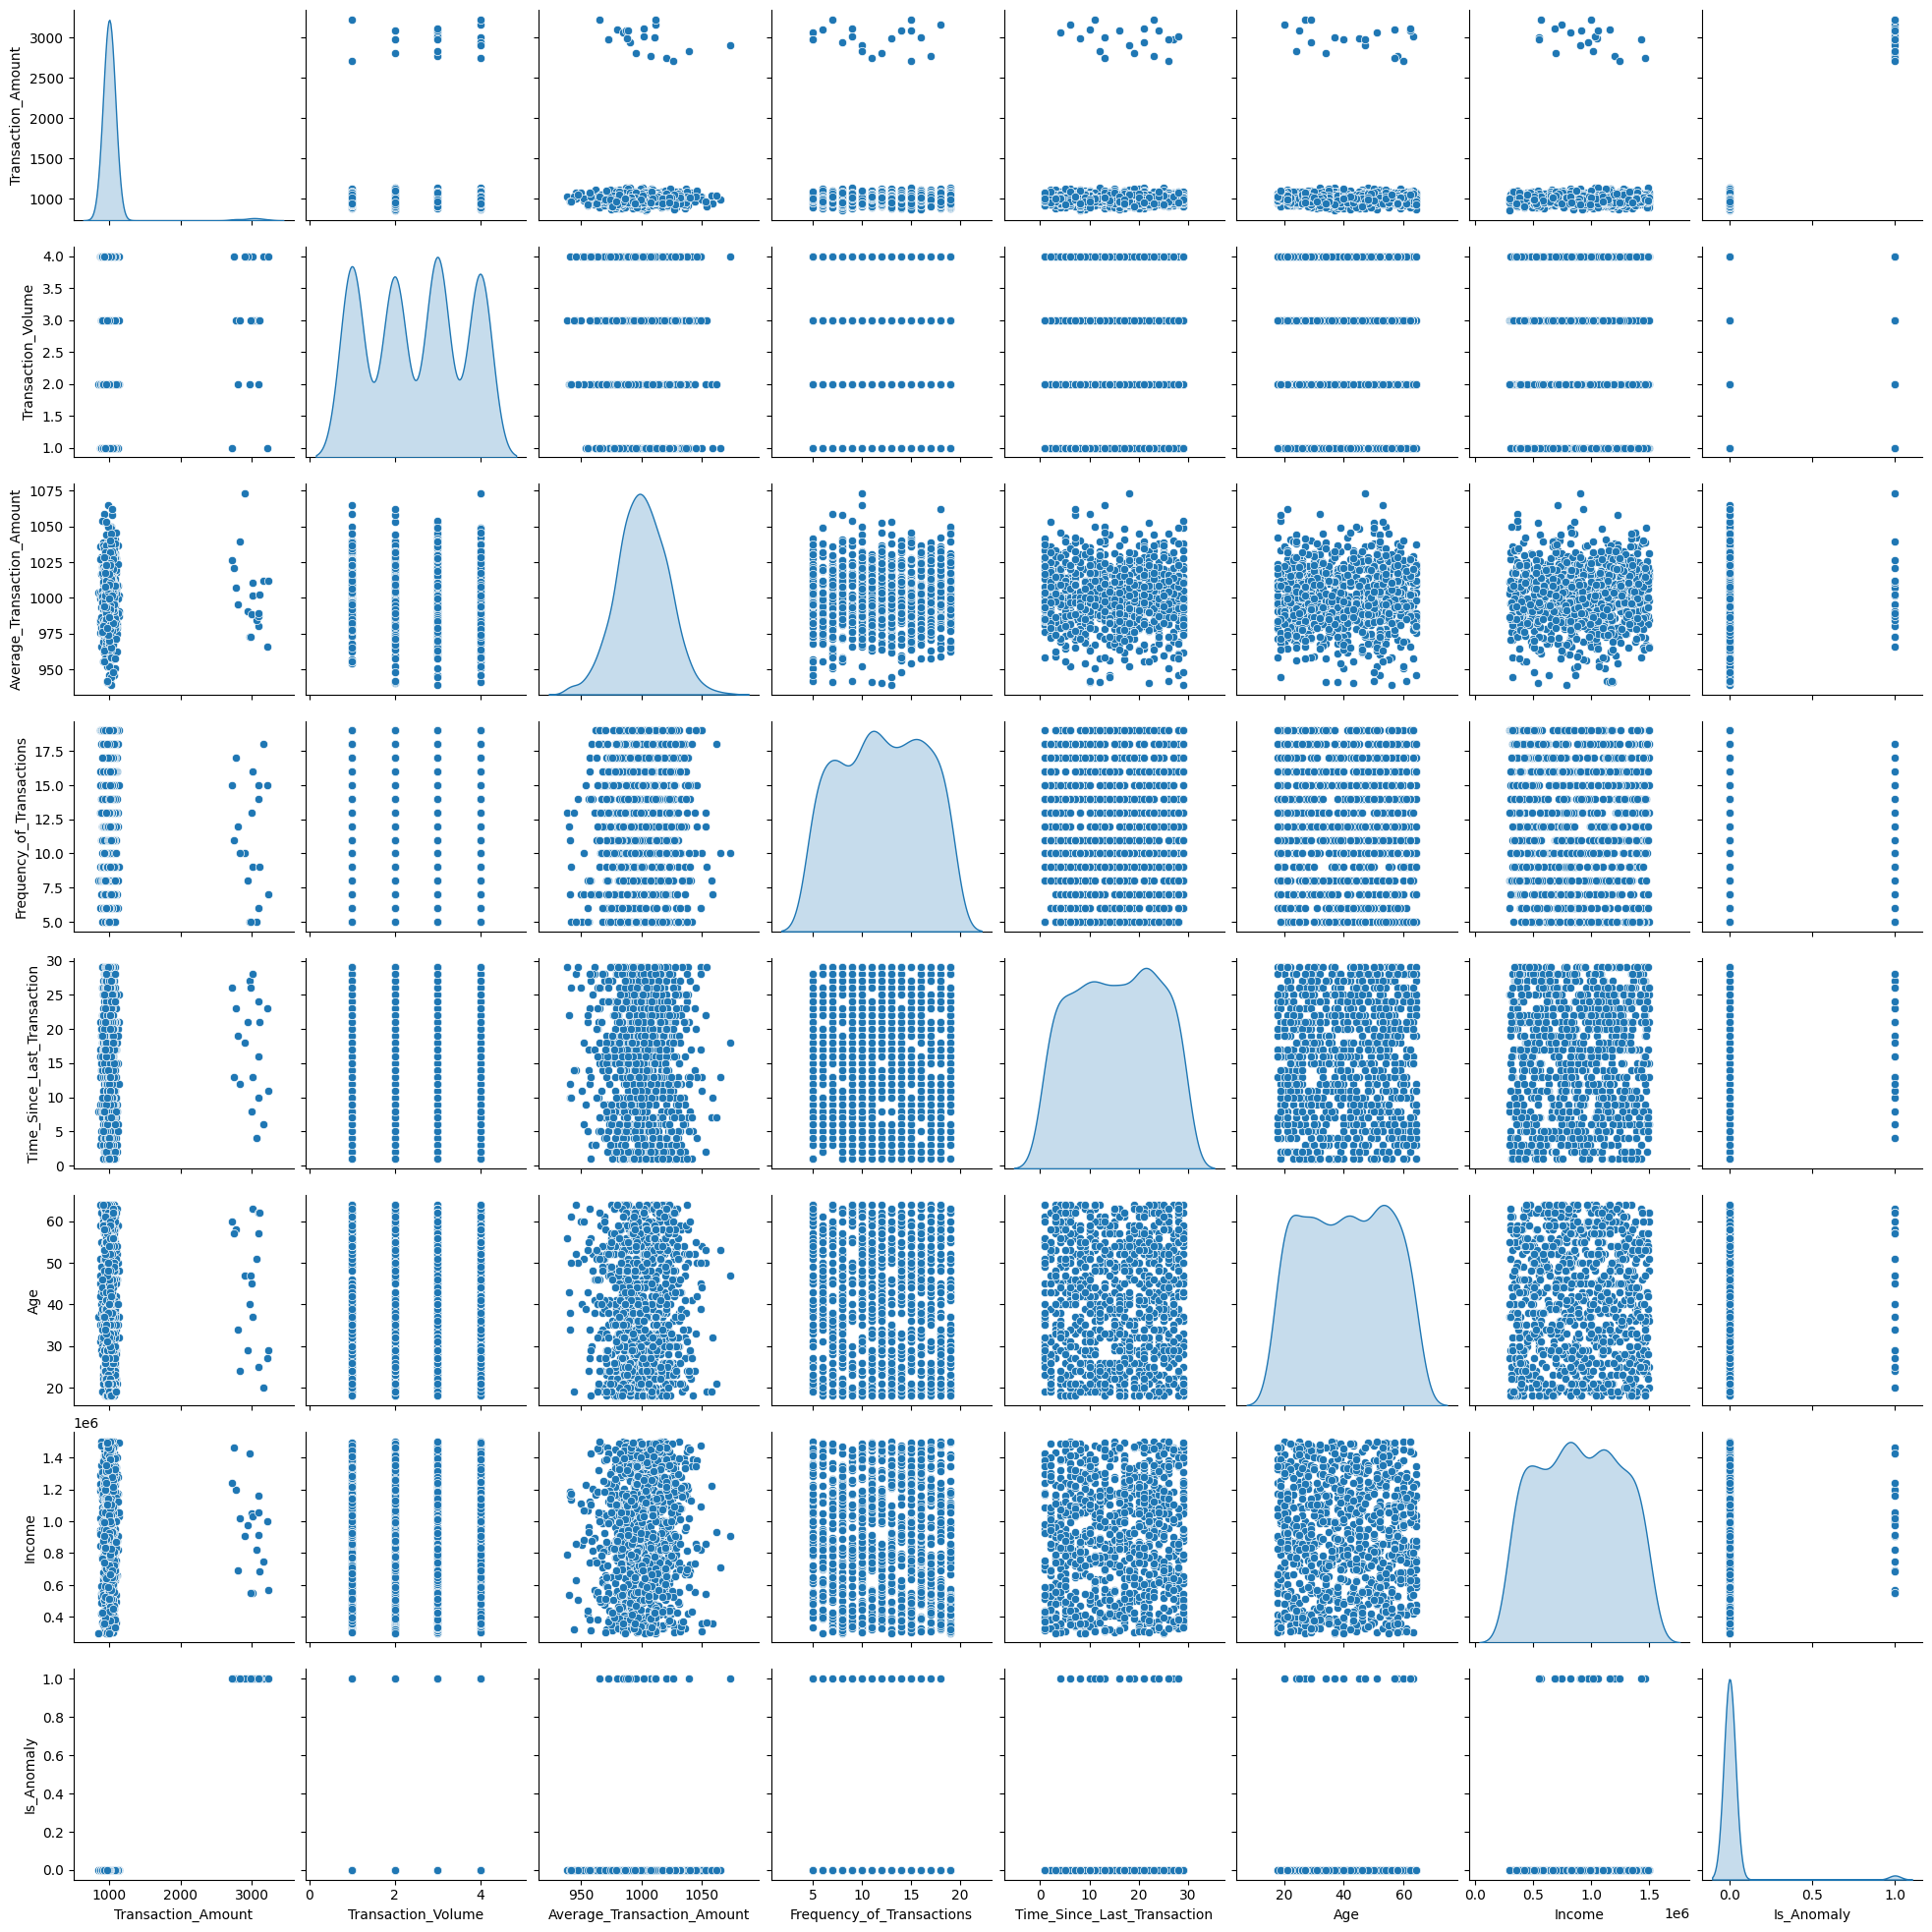

In [70]:
sns.pairplot(data, diag_kind='kde')
plt.show()

In [25]:
# Transaction Amount by Account Type
fig_box_amount = px.box(data,
                        x='Account_Type',
                        y='Transaction_Amount',
                        title='Transaction Amount by Account Type')
fig_box_amount.show()

In [26]:
# Average Transaction Amount vs. Age
fig_scatter_avg_amount_age = px.scatter(data, x='Age',
                                        y='Average_Transaction_Amount',
                                        color='Account_Type',
                                        title='Average Transaction Amount vs. Age',
                                        trendline='ols')
fig_scatter_avg_amount_age.show()

In [27]:
# Count of Transactions by Day of the Week
fig_day_of_week = px.bar(data, x='Day_of_Week',
                         title='Count of Transactions by Day of the Week')
fig_day_of_week.show()

In [28]:
# Correlation Heatmap
correlation_matrix = data.corr()
fig_corr_heatmap = px.imshow(correlation_matrix,
                             title='Correlation Heatmap')
fig_corr_heatmap.show()

<ipython-input-28-5299ddece13e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [29]:
# Calculate mean and standard deviation of Transaction Amount
mean_amount = data['Transaction_Amount'].mean()
std_amount = data['Transaction_Amount'].std()

# Define the anomaly threshold (2 standard deviations from the mean)
anomaly_threshold = mean_amount + 2 * std_amount

# Flag anomalies
data['Is_Anomaly'] = data['Transaction_Amount'] > anomaly_threshold

# Scatter plot of Transaction Amount with anomalies highlighted
fig_anomalies = px.scatter(data, x='Transaction_Amount', y='Average_Transaction_Amount',
                           color='Is_Anomaly', title='Anomalies in Transaction Amount')
fig_anomalies.update_traces(marker=dict(size=12),
                            selector=dict(mode='markers', marker_size=1))
fig_anomalies.show()

In [30]:
# Calculate the number of anomalies
num_anomalies = data['Is_Anomaly'].sum()

# Calculate the total number of instances in the dataset
total_instances = data.shape[0]

# Calculate the ratio of anomalies
anomaly_ratio = num_anomalies / total_instances
print(anomaly_ratio)

0.02


In [31]:
relevant_features = ['Transaction_Amount',
                     'Average_Transaction_Amount',
                     'Frequency_of_Transactions']

# Split data into features (X) and target variable (y)
X = data[relevant_features]
y = data['Is_Anomaly']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [32]:
# Train the Isolation Forest model
IF_model = IsolationForest(contamination=0.02, random_state=42)
IF_model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.02, random_state=42)

In [33]:
# Predict anomalies on the test set
y_pred1 = IF_model.predict(X_test)

# Convert predictions to binary values (0: normal, 1: anomaly)
y_pred_binary1 = [1 if pred == -1 else 0 for pred in y_pred1]

# Evaluate the model's performance
report1 = classification_report(y_test, y_pred_binary1, target_names=['Normal', 'Anomaly'])
print(report1)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [34]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

In [63]:
# Train the Local Outlier Factor (LOF) model
lof_model = LocalOutlierFactor(n_neighbors=20, novelty=True)
lof_model.fit(X_train)

LocalOutlierFactor(novelty=True)

In [36]:
# # Predict anomalies on the test set using fit_predict
# y_pred2 = lof_model.fit_predict(X_test)

# # Convert predictions to binary values (0: normal, 1: anomaly)
# y_pred_binary2 = [1 if pred == -1 else 0 for pred in y_pred2]

# # Evaluate the model's performance
# from sklearn.metrics import classification_report

# report2 = classification_report(y_test, y_pred_binary2, target_names=['Normal', 'Anomaly'])
# print(report)


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [38]:
# Train the KMeans model
num_clusters = 10  # Adjust the number of clusters based on your data characteristics
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=10, random_state=42)

In [39]:
from sklearn.metrics import silhouette_samples

# Predict the cluster labels for each instance
train_cluster_labels = kmeans_model.predict(X_train)
test_cluster_labels = kmeans_model.predict(X_test)

# Calculate the silhouette scores for each sample
train_silhouette_scores = silhouette_samples(X_train, train_cluster_labels)

# Set a threshold based on silhouette score
silhouette_threshold = 0.2  # Adjust the threshold based on your data and requirements

# Identify anomalies based on silhouette score
anomaly_indices = [index for index, score in enumerate(train_silhouette_scores) if score < silhouette_threshold]
y_train_anomalies = [1 if index in anomaly_indices else 0 for index in range(len(X_train))]

# Evaluate the model's performance
from sklearn.metrics import classification_report

report = classification_report(y_train, y_train_anomalies, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       0.97      0.74      0.84       784
     Anomaly       0.00      0.00      0.00        16

    accuracy                           0.72       800
   macro avg       0.49      0.37      0.42       800
weighted avg       0.95      0.72      0.82       800



In [40]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [41]:
# Train the DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_train)


In [42]:
# Predict the cluster labels for each instance
train_cluster_labels = dbscan_model.labels_

# Set a threshold based on cluster assignment
anomaly_label = -1  # Adjust based on DBSCAN's label for anomalies

# Identify anomalies based on cluster assignment
y_train_anomalies = [1 if label == anomaly_label else 0 for label in train_cluster_labels]

# Evaluate the model's performance
report = classification_report(y_train, y_train_anomalies, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       784
     Anomaly       0.02      1.00      0.04        16

    accuracy                           0.02       800
   macro avg       0.01      0.50      0.02       800
weighted avg       0.00      0.02      0.00       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [43]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report


In [44]:
# Train the One-Class SVM model
svm_model = OneClassSVM(nu=0.02, kernel='rbf', gamma=0.1)
svm_model.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.02)

In [45]:
# Predict anomalies on the test set
y_pred = svm_model.predict(X_test)

# Convert predictions to binary values (1: normal, -1: anomaly)
y_pred_binary = [1 if pred == 1 else 0 for pred in y_pred]

# Evaluate the model's performance
report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)


              precision    recall  f1-score   support

      Normal       0.98      0.99      0.98       196
     Anomaly       0.00      0.00      0.00         4

    accuracy                           0.97       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.96      0.97      0.97       200



In [64]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model
user_anomaly_pred_IF = IF_model.predict(user_df)

# # Predict anomalies using the model
# user_anomaly_pred_lof = lof_model.predict(user_df)

# Predict anomalies using the model
user_anomaly_pred_kmeans = kmeans_model.predict(user_df)

# Predict anomalies using the model
user_anomaly_pred_dbscan = dbscan_model.fit_predict(user_df)

# Predict anomalies using the model
user_anomaly_pred_svm = svm_model.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary_IF = 1 if user_anomaly_pred_IF == -1 else 0

if user_anomaly_pred_binary_IF == 1:
    print("Anomaly detected by Isolation Forest : This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected by Isolation Forest: This transaction is normal.")

# Get the LOF score for the single instance
single_instance_lof_score = lof_model.decision_function(user_df)

# Define a threshold for anomaly detection (you need to experiment with this)
anomaly_threshold = -2.5

# Determine if the single instance is an anomaly
if single_instance_lof_score < anomaly_threshold:
    print("Anomaly detected by Local Outlier Factor: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected by Local Outlier Factor: This transaction is normal.")


# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary_kmeans = 1 if user_anomaly_pred_kmeans == -1 else 0

if user_anomaly_pred_binary_kmeans == 1:
    print("Anomaly detected by K-Means: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected by K-Means: This transaction is normal.")

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary_dbscan = 1 if user_anomaly_pred_dbscan == -1 else 0

if user_anomaly_pred_binary_dbscan == 1:
    print("Anomaly detected by DBSCAN: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected by DBSCAN: This transaction is normal.")

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary_svm = 1 if user_anomaly_pred_svm == -1 else 0

if user_anomaly_pred_binary_svm == 1:
    print("Anomaly detected by One Class SVM : This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected by One Class SVM: This transaction is normal.")

Enter the value for 'Transaction_Amount': 1000
Enter the value for 'Average_Transaction_Amount': 900
Enter the value for 'Frequency_of_Transactions': 6
No anomaly detected by Isolation Forest: This transaction is normal.
No anomaly detected by Local Outlier Factor: This transaction is normal.
No anomaly detected by K-Means: This transaction is normal.
Anomaly detected by DBSCAN: This transaction is flagged as an anomaly.
Anomaly detected by One Class SVM : This transaction is flagged as an anomaly.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names



In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [72]:
# Calculate accuracy scores
accuracy_IF = accuracy_score(y_test, y_pred_binary_IF)
accuracy_kmeans = accuracy_score(y_test, y_pred_binary_kmeans)
accuracy_dbscan = accuracy_score(y_test, y_pred_binary_dbscan)
accuracy_svm = accuracy_score(y_test, y_pred_binary_svm)

# Calculate F1 scores
f1_IF = f1_score(y_test, y_pred_binary_IF)
f1_kmeans = f1_score(y_test, y_pred_binary_kmeans)
f1_dbscan = f1_score(y_test, y_pred_binary_dbscan)
f1_svm = f1_score(y_test, y_pred_binary_svm)

# Create classification reports
report_IF = classification_report(y_test, y_pred_binary_IF, target_names=['Normal', 'Anomaly'])
report_kmeans = classification_report(y_test, y_pred_binary_kmeans, target_names=['Normal', 'Anomaly'])
report_dbscan = classification_report(y_test, y_pred_binary_dbscan, target_names=['Normal', 'Anomaly'])
report_svm = classification_report(y_test, y_pred_binary_svm, target_names=['Normal', 'Anomaly'])

# Print the reports
print("Isolation Forest:")
print(report_IF)
print("Accuracy (Isolation Forest):", accuracy_IF)
print("F1 Score (Isolation Forest):", f1_IF)

print("\nK-Means:")
print(report_kmeans)
print("Accuracy (K-Means):", accuracy_kmeans)
print("F1 Score (K-Means):", f1_kmeans)

print("\nDBSCAN:")
print(report_dbscan)
print("Accuracy (DBSCAN):", accuracy_dbscan)
print("F1 Score (DBSCAN):", f1_dbscan)

print("\nOne Class SVM:")
print(report_svm)
print("Accuracy (One Class SVM):", accuracy_svm)
print("F1 Score (One Class SVM):", f1_svm)


Isolation Forest:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy (Isolation Forest): 1.0
F1 Score (Isolation Forest): 1.0

K-Means:
              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99       196
     Anomaly       0.00      0.00      0.00         4

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200

Accuracy (K-Means): 0.98
F1 Score (K-Means): 0.0

DBSCAN:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       196
     Anomaly       0.02      1.00      0.04         4

    accuracy                  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p